In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

photo1 = '/content/drive/MyDrive/1.2.826.0.1.3680043.8.498.10007325230839039576266816449875945674.jpg'
photo2 = '/content/drive/MyDrive/1.2.826.0.1.3680043.8.498.10009200682227193533239127301911164377.jpg'
photo3 = '/content/drive/MyDrive/1.2.826.0.1.3680043.8.498.10009804582155067294620004418359998775.jpg'

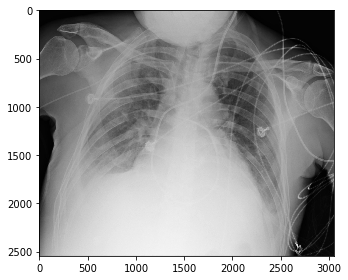

In [14]:
image = imread(photo1)
imshow(image)

In [ ]:
#checking image shape 
image.shape

(2544, 3056)

In [ ]:
#grey scale pixel values as features

features = np.reshape(image, (2544*3056))

features.shape, features

((7774464,), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

## HARRIS CORNER DETECTOR

In [ ]:

img = cv2.imread(photo2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 8, 3 , 0.04)

# Applying dilation to increase the object area and to emphasize features
dst = cv2.dilate(dst,None)

# Threshold for an optimal value. It may vary depending on the image.
img[dst>0.0001*dst.max()]=[255, 0, 255]


In [ ]:

img2 = cv2.imread(photo1)
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 8, 3 , 0.04)

# Applying dilation to increase the object area and to emphasize features
dst = cv2.dilate(dst,None)

# Threshold for an optimal value. It may vary depending on the image.
img2[dst>0.0001*dst.max()]=[255, 0, 255]

img3 = cv2.imread(photo3)
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 8, 3 , 0.04)

# Applying dilation to increase the object area and to emphasize features
dst = cv2.dilate(dst,None)

# Threshold for an optimal value. It may vary depending on the image.
img3[dst>0.0001*dst.max()]=[255, 0, 255]



(-0.5, 2499.5, 2047.5, -0.5)

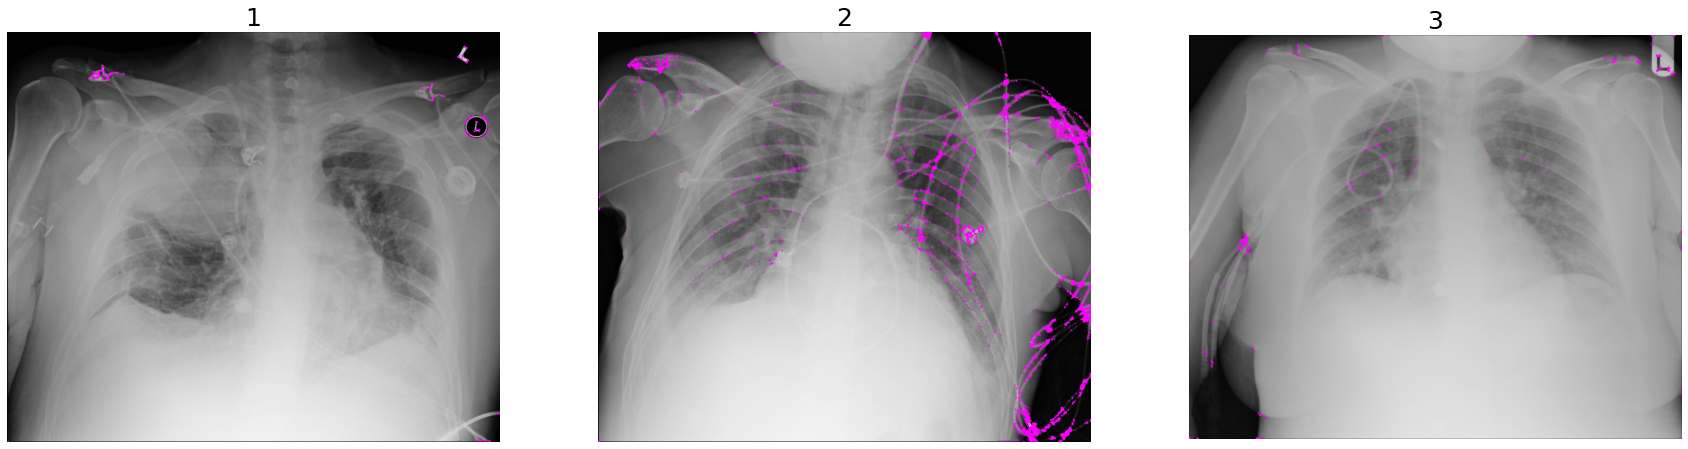

In [ ]:
fig = plt.figure(figsize=(30, 20))
ax0 = fig.add_subplot(131)
ax0.imshow(img)
ax0.set_title('1',fontsize= 25)
ax0.axis('off')
ax1 = fig.add_subplot(132)
ax1.imshow(img2)
ax1.set_title('2',fontsize= 25)
ax1.axis('off')
ax2 = fig.add_subplot(133)
ax2.imshow(img3)
ax2.set_title('3',fontsize= 25)
ax2.axis('off')

## Shi-Tomasi Corner Detector

In [ ]:
#Shi-Tomasi Corner Detector
img_1 = cv2.imread(photo2)
gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 2000, 0.01, 1)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img_1, (x,y), 3, (255, 0, 255), -1)

img_2 = cv2.imread(photo1)
gray = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 2000, 0.01, 1)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img_2, (x,y), 3, (255, 0, 255), -1)

img_3 = cv2.imread(photo3)
gray = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 2000, 0.01, 1)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img_3, (x,y), 3, (255, 0, 255), -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


(-0.5, 2499.5, 2047.5, -0.5)

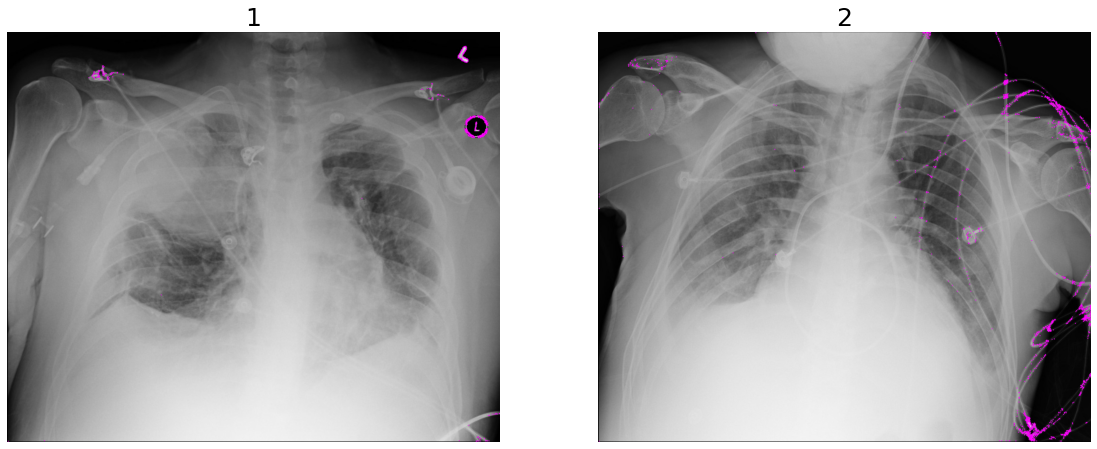

In [ ]:
fig2 = plt.figure(figsize=(30, 20))
ax_0 = fig2.add_subplot(131)
ax_0.imshow(img_1)
ax_0.set_title('1',fontsize= 25)
ax_0.axis('off')
ax_1 = fig2.add_subplot(132)
ax_1.imshow(img_2)
ax_1.set_title('2',fontsize= 25)
ax_1.axis('off')
ax_2 = fig.add_subplot(133)
ax_2.imshow(img_3)
ax_2.set_title('3',fontsize= 25)
ax_2.axis('off')

## TEMPLATE MATCHING

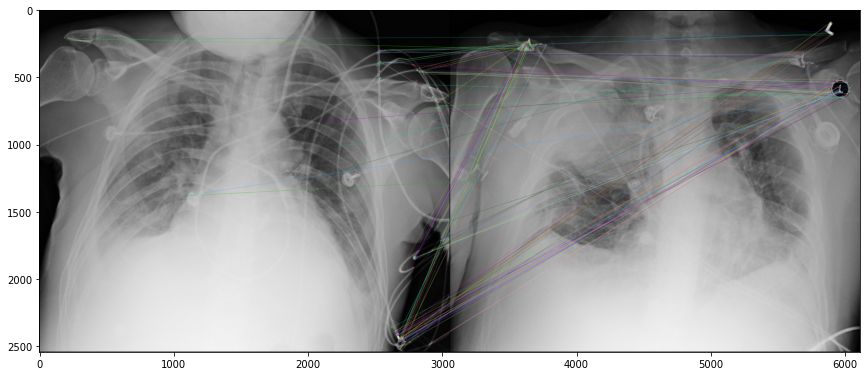

In [ ]:
img_1 = cv2.imread(photo1,0)          # queryImage
img_2 = cv2.imread(photo2,0) # trainImage
# Initiate SIFT detector
orb = cv2.ORB_create(nfeatures=1000)
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img_1,None)
kp2, des2 = orb.detectAndCompute(img_2,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
# draw first 1000 matches
match_img = cv2.drawMatches(img_1, kp1, img_2, kp2, matches[:1000], None)
figu = plt.figure(figsize=(50, 40))
ax = figu.add_subplot(131)
ax.imshow(match_img)

## IMAGE CONTOURS

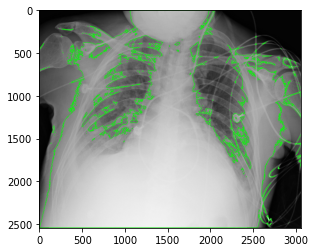

In [ ]:
image = cv2.imread(photo1) 
#converting RGB image to Binary 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)